## Import Statements

In [65]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import load_model

## Import and Explore Data

### This is totally fake data

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


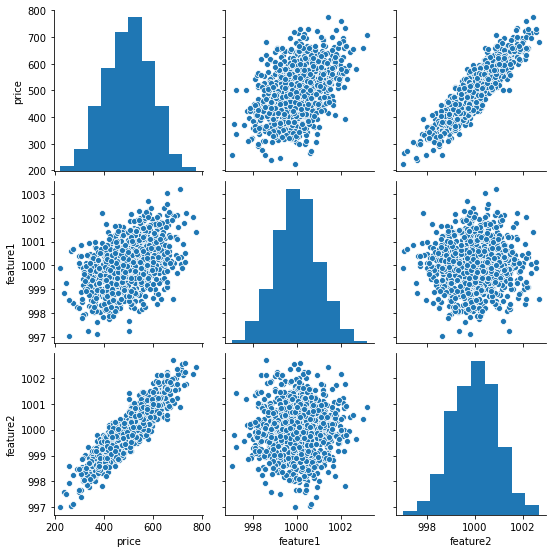

In [5]:
sns.pairplot(df)

## Test Train split

In [7]:
X = df[['feature1', 'feature2']].values

In [9]:
y = df['price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

## Normalization

In [15]:
#help(MinMaxScaler)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.min()

0.0

## Keras and Tensorflow setup

In [25]:
#help(Sequential)

In [26]:
#help(Dense)

In [27]:
# Sequential arg is a list of layers
#model = Sequential([Dense(4, activation = 'relu'), 
#                   Dense(2, activation = 'relu'),
#                   Dense(1)])

In [29]:
# Otherwise you can create an empty model and add the layers after
model = Sequential()

# Better because it is easy to add or remove layers
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

#model.add(Dense(2, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model.fit(x=X_train, y=y_train, epochs=250) # 250 times through data

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
700/700 [==============================] - 0s 314us/sample - loss: 256771.2479
Epoch 2/250
700/700 [==============================] - 0s 29us/sample - loss: 256607.3185
Epoch 3/250
700/700 [==============================] - 0s 29us/sample - loss: 256446.4421
Epoch 4/250
700/700 [==============================] - 0s 28us/sample - loss: 256276.4982
Epoch 5/250
700/700 [==============================] - 0s 30us/sample - loss: 256099.1716
Epoch 6/250
700/700 [==============================] - 0s 30us/sample - loss: 255909.3075
Epoch 7/250
700/700 [==============================] - 0s 29us/sample - loss: 255700.5128
Epoch 8/250
700/700 [==============================] - 0s 30us/sample - loss: 255470.5730
Epoch 9/250
700/700 [==============================] - 0s 29us/sample - loss: 255222.7079
Epoch 10/250
700/700 [==============================] - 0s 29us/sample - loss: 254953.3214
Ep

700/700 [==============================] - 0s 30us/sample - loss: 1522.4113
Epoch 86/250
700/700 [==============================] - 0s 31us/sample - loss: 1489.3044
Epoch 87/250
700/700 [==============================] - 0s 29us/sample - loss: 1459.0245
Epoch 88/250
700/700 [==============================] - 0s 30us/sample - loss: 1425.0927
Epoch 89/250
700/700 [==============================] - 0s 31us/sample - loss: 1392.0977
Epoch 90/250
700/700 [==============================] - 0s 31us/sample - loss: 1363.0728
Epoch 91/250
700/700 [==============================] - 0s 30us/sample - loss: 1333.3187
Epoch 92/250
700/700 [==============================] - 0s 31us/sample - loss: 1300.7079
Epoch 93/250
700/700 [==============================] - 0s 29us/sample - loss: 1270.7009
Epoch 94/250
700/700 [==============================] - 0s 31us/sample - loss: 1238.7606
Epoch 95/250
700/700 [==============================] - 0s 33us/sample - loss: 1208.3578
Epoch 96/250
700/700 [============

700/700 [==============================] - 0s 32us/sample - loss: 25.3823
Epoch 178/250
700/700 [==============================] - 0s 33us/sample - loss: 25.5706
Epoch 179/250
700/700 [==============================] - 0s 31us/sample - loss: 25.1630
Epoch 180/250
700/700 [==============================] - 0s 31us/sample - loss: 24.8658
Epoch 181/250
700/700 [==============================] - 0s 31us/sample - loss: 24.7484
Epoch 182/250
700/700 [==============================] - 0s 30us/sample - loss: 25.0296
Epoch 183/250
700/700 [==============================] - 0s 30us/sample - loss: 24.4585
Epoch 184/250
700/700 [==============================] - 0s 30us/sample - loss: 24.9885
Epoch 185/250
700/700 [==============================] - 0s 30us/sample - loss: 24.7406
Epoch 186/250
700/700 [==============================] - 0s 30us/sample - loss: 24.1983
Epoch 187/250
700/700 [==============================] - 0s 30us/sample - loss: 24.0999
Epoch 188/250
700/700 [=======================

In [33]:
loss_df = pd.DataFrame(model.history.history)

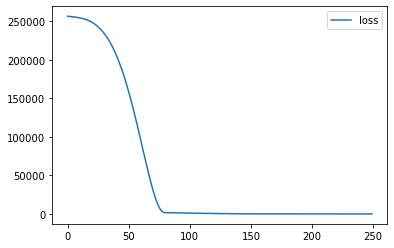

In [34]:
loss_df.plot()

In [36]:
model.evaluate(X_test, y_test, verbose=0)

25.60624572753906

In [37]:
model.evaluate(X_train, y_train, verbose=0)

23.86085350036621

# Predictions

In [38]:
predictions = model.predict(X_test)

In [40]:
#predictions

In [41]:
predictions = pd.Series(predictions.reshape(300,))

In [43]:
#predictions

In [46]:
pred_df = pd.DataFrame(y_test, columns=['Test True y'])

In [47]:
pred_df = pd.concat([pred_df, predictions], axis=1)

In [49]:
pred_df.head()

,Test True y,0
0,402.296319,405.810974
1,624.156198,624.423462
2,582.455066,592.964111
3,578.588606,573.023315
4,371.224104,367.070709


In [50]:
pred_df.columns = ['Test True y', 'Model Predictions']

In [51]:
pred_df.head()

,Test True y,Model Predictions
0,402.296319,405.810974
1,624.156198,624.423462
2,582.455066,592.964111
3,578.588606,573.023315
4,371.224104,367.070709


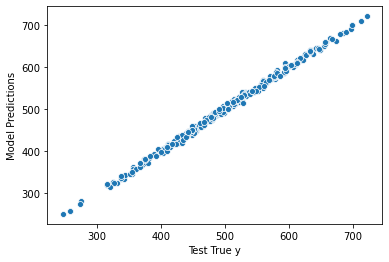

In [52]:
sns.scatterplot(x='Test True y', y = 'Model Predictions', data = pred_df)

In [55]:
mean_absolute_error(pred_df['Test True y'], pred_df['Model Predictions'])

4.080774228290772

In [57]:
# The mean absolute error is only off by 1%
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [60]:
mean_squared_error(pred_df['Test True y'], pred_df['Model Predictions'])

25.606248508025505

In [61]:
mean_squared_error(pred_df['Test True y'], pred_df['Model Predictions'])**0.5

5.060261703511539

## Using the model on novel data

In [62]:
new_gem = [[998, 1000]]

In [63]:
# Must be scaled using the original scaler that was trained on the training data
new_gem = scaler.transform(new_gem)

In [64]:
model.predict(new_gem) # Returns the predicted price

array([[420.22916]], dtype=float32)

## Saving the model

In [66]:
model.save('TensorFlow_FILES/my_gem_model.h5')

In [67]:
# Model can then be loaded and used to make further predictions
later_model = load_model('TensorFlow_FILES/my_gem_model.h5')

In [68]:
later_model.predict(new_gem)

array([[420.22916]], dtype=float32)